In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pandas as pd
mpl.rcParams['figure.dpi'] = 96
import matplotlib.pyplot as plt
print(np.__version__)
print(mpl.__version__)


1.24.4
3.8.0


***
## DATA 601 - Sleep Efficiency 
***
**Team Members**

- Maria Delgado
- Safa Hadi
- Farhad Ahmady
  
***
## Outline

- [Key Guiding Questions](#Ques)
- [Introduction](#intro)
- [Initial Data Cleaning](#clean) 
- [Question 1](#Q1)
- [Question 2](#Q2)
- [Question 3](#Q3)
- [Question 4](#Q4)
- [Conclusion](#conclusion)
***
### 5 <a name="Ques"></a>KEY GUIDING QUESTIONS:

The following guiding questions are intended to better understand how sleep efficiency interacts with factors related to one's lifestyle
***


### 1) Is an individual’s lifestyle responsible for the efficiency of their sleep? (Caffeine consumption, alcohol consumption, exercise and smoking status) 


<br>

### 2) Are there significant differences in sleep percentage among different age groups and genders? (Exploring all three sleep cycles). 
 > #### Which age groups are more likely to experience deep sleep?
<br>

### 3) Does the bedtime influence overall sleep quality and efficiency?
<br>

### 4) Is there a correlation between sleep duration and deep sleep?  
<br>



## <a name="intro"></a>Introduction
***
Sleep efficiency is an important part of everyone's lives. We wanted to explore how the lifestyle and demographic of an individual would affect their sleep efficiency. One's daily habits includes so many different variables such as whether they consume coffee, how often they exercise , the amount of alcohol they consume, their smoking status and what time they choose to go to bed. All of these variables have a great potential in affecting the overall sleep efficiency of an individual. When talking about sleep efficiency, we are also looking at the deep sleep percetage, the number of awakenings that they experience per night and other factors that play into how efficient the sleep is. Through this analysis we were hoping to understand how such variables affect sleep quality, as well as, visualize the relationship between the different variables with a number of different plots. How do these correlate to their sleep efficiency? Also, how does one's age and gender play into the imapct on sleep efficiency? These questions will guide our statistical analysis and visualization to answer such questions and provide further insights to help improve the overall sleep quality. 

## <a name="clean"></a> Our Data
***
The dataset used in our analysis was collected as part of a study conducted in Morocco by a group of artificial intelligence engineering students from ENSIAS. The data was collected using a combination of self-reported surveys, actigraphy, and polysomnography which is a sleep monitoring technique. The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.



## <a name="clean"></a>Initial Data Cleaning
***

The following steps are completed for initial data cleaning:
1) Extract data from the raw data files (Excel CSV format).
2) Coding for gender and smoking status. Male = 1, Female = 0, Smoking = 0, Nonsmoker = 1
3) Drop the columns 'Gender' and 'Smoking status' from the sleepdata data frame and replace them with 'Sex' and 'Smoking'.
4) Extract the time component from the 'Bedtime' and 'Wakeup time' columns and rename the columns accordingly. 
5) Rearrange the column order in the sleepdata DataFrame.

In [2]:
sleepdata = pd.read_csv('Sleep_data.csv', parse_dates=['Bedtime', 'Wakeup time'])
print(sleepdata.dtypes)
display(sleepdata.head())

ID                                 int64
Age                                int64
Gender                            object
Bedtime                   datetime64[ns]
Wakeup time               datetime64[ns]
Sleep duration                   float64
Sleep efficiency                 float64
REM sleep percentage               int64
Deep sleep percentage              int64
Light sleep percentage             int64
Awakenings                       float64
Caffeine consumption             float64
Alcohol consumption              float64
Smoking status                    object
Exercise frequency               float64
dtype: object


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
import pandas as pd
import numpy as np
pd.set_option("mode.copy_on_write", True)
pd.__version__

'2.1.1'

In [4]:
sleepdata['Sex']=sleepdata['Gender'].apply(lambda X:1 if X=='Male' else 0)
sleepdata['Smoking'] = sleepdata['Smoking status'].apply(lambda x:1 if x == 'Yes' else 0)
sleepdata.drop(['Gender','Smoking status'],axis='columns', inplace=True)
sleepdata.shape
sleepdata.head()

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Sex,Smoking
0,1,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1
1,2,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1
2,3,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0
3,4,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1
4,5,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0


In [5]:
# Extracting time component from 'Bedtime' and 'Wakeup time' columns
sleepdata['Bedtime_Time'] = sleepdata['Bedtime'].dt.time
sleepdata['Wakeup_Time'] = sleepdata['Wakeup time'].dt.time

# Dropping the original datetime columns if needed
sleepdata.drop(columns=['Bedtime', 'Wakeup time'], inplace=True)

# Display first few rows with extracted time component
display(sleepdata.head())

# Display data types after extracting time component
print(sleepdata.dtypes)

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Sex,Smoking,Bedtime_Time,Wakeup_Time
0,1,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1,01:00:00,07:00:00
1,2,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1,02:00:00,09:00:00
2,3,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0,21:30:00,05:30:00
3,4,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1,02:30:00,08:30:00
4,5,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0,01:00:00,09:00:00


ID                          int64
Age                         int64
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Exercise frequency        float64
Sex                         int64
Smoking                     int64
Bedtime_Time               object
Wakeup_Time                object
dtype: object


In [6]:
sleepdata.rename(columns={'Bedtime_Time': 'Bed Time', 'Wakeup_Time': 'Wakeup Time'}, inplace=True)

# Display first few rows with renamed columns
display(sleepdata.head())

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Sex,Smoking,Bed Time,Wakeup Time
0,1,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1,01:00:00,07:00:00
1,2,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1,02:00:00,09:00:00
2,3,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0,21:30:00,05:30:00
3,4,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1,02:30:00,08:30:00
4,5,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0,01:00:00,09:00:00


In [7]:
# Reorganize columns
columns_order = ['ID', 'Age', 'Bed Time', 'Wakeup Time', 'Sleep duration', 'Sleep efficiency', 
                 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 
                 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Sex', 'Smoking']
sleepdata = sleepdata[columns_order]

# Now 'Bed Time' and 'Wakeup Time' columns are right beside 'Gender'
display(sleepdata.head())

,ID,Age,Bed Time,Wakeup Time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Sex,Smoking
0,1,65,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1
1,2,69,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1
2,3,40,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0
3,4,40,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1
4,5,57,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0


### 1) <a name="Q1"></a>Is an individual’s lifestyle responsible for the efficiency of their sleep? (Caffeine consumption, alcohol consumption, exercise and smoking status) 



In [8]:
columns_of_interest = ['Sleep efficiency', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Smoking']
subset_sleepdata = sleepdata[columns_of_interest]

In [9]:
correlation_matrix = subset_sleepdata.corr()
correlation_matrix

,Sleep efficiency,Caffeine consumption,Alcohol consumption,Exercise frequency,Smoking
Sleep efficiency,1.000000,0.065082,-0.389624,0.259563,-0.290026
Caffeine consumption,0.065082,1.000000,-0.123308,-0.068224,0.007419
Alcohol consumption,-0.389624,-0.123308,1.000000,0.006934,0.074824
Exercise frequency,0.259563,-0.068224,0.006934,1.000000,-0.040804
Smoking,-0.290026,0.007419,0.074824,-0.040804,1.000000


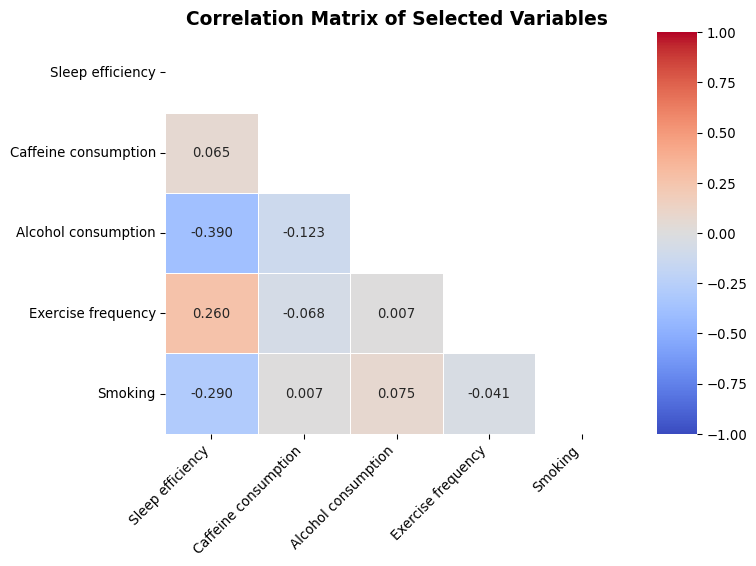

In [10]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))

# Step 2: Plot the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f",
            linewidths=.5, mask=mask, cbar_kws={'aspect': 10}, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Selected Variables', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


To understand the impact of lifestyle factors such as caffeine and alcohol consumption, exercise frequency, and smoking status on sleep efficiency, we created a correlation matrix to observe how each variable is associated with sleep efficiency. Our analysis revealed that lifestyle factors, including alcohol consumption and smoking, have been identified as having a weak negative correlation with sleep efficiency, with coefficients of -0.390 and -0.290, respectively. On the contrary, the frequency of exercise demonstrates a weak positive correlation with sleep efficiency with a coefficient of 0.260. However, the data does not provide enough evidence to establish a correlation between caffeine consumption and sleep efficiency with a coefficient of 0.065.

The results suggest that reducing alcohol consumption and smoking and increasing physical activity could be effective for improving sleep quality. However, the effects of caffeine consumption are not clear.

### Sleep Efficiency by Caffeine Consumption

In [11]:
bins = [0, 25, 50, 75, 100]
labels = ['0-25', '25-50', '50-75', '75-100']

# Categorize the data into bins
sleepdata['Caffeine Consumption Bin'] = pd.cut(sleepdata['Caffeine consumption'], bins=bins, labels=labels, right=False)

In [12]:
# Calculate average sleep efficiency by Caffeine Consumption
avg_sleepdata_efficiency_by_caffeine = sleepdata.groupby('Caffeine Consumption Bin')['Sleep efficiency'].mean().reset_index()

/tmp/ipykernel_98/1187610294.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sleepdata_efficiency_by_caffeine = sleepdata.groupby('Caffeine Consumption Bin')['Sleep efficiency'].mean().reset_index()


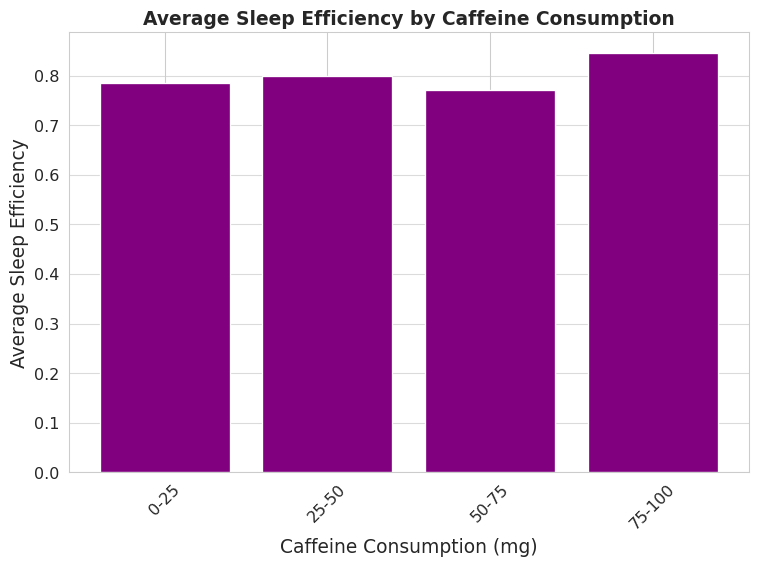

In [13]:
plt.figure(figsize=(8, 6))

sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(avg_sleepdata_efficiency_by_caffeine['Caffeine Consumption Bin']))

plt.bar(avg_sleepdata_efficiency_by_caffeine['Caffeine Consumption Bin'], avg_sleepdata_efficiency_by_caffeine['Sleep efficiency'], color='purple')
plt.title('Average Sleep Efficiency by Caffeine Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Caffeine Consumption (mg)', fontsize=14)
plt.ylabel('Average Sleep Efficiency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In this part of our analysis, we tried to explore the potential influence of caffeine consumption on sleep efficiency. We categorized caffeine intake into distinct bins to identify trends in how varying levels of caffeine affect the quality of sleep. 

The above bar chart represents the average sleep efficiency across different levels of caffeine consumption. Our findings do not indicate a noticeable trend where sleep efficiency appears to be influenced by the amount of caffeine intake. Our visual illustrates that different caffeine intake categories influence sleep efficiency by a very small percentage. 

### Sleep Efficiency by Alcohol Consumption

In [14]:
# Calculate average sleep efficiency by Alcohol Consumption
avg_sleepdata_efficiency_by_alcohol = sleepdata.groupby('Alcohol consumption')['Sleep efficiency'].mean().reset_index()

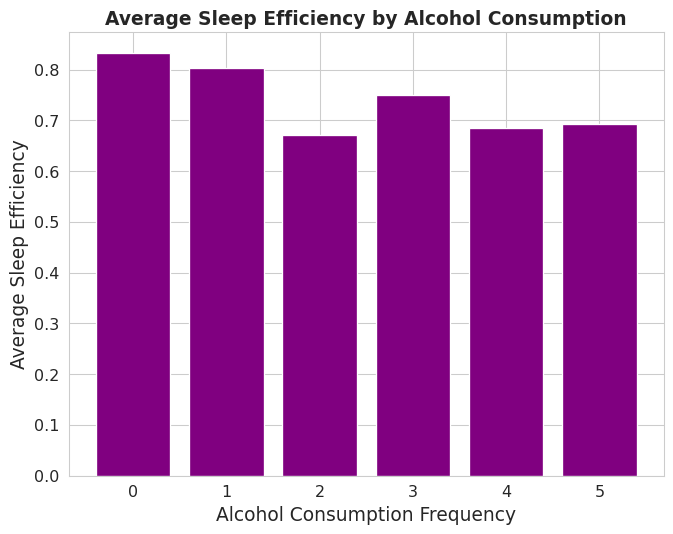

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(avg_sleepdata_efficiency_by_alcohol['Alcohol consumption'], avg_sleepdata_efficiency_by_alcohol['Sleep efficiency'], color='Purple')
plt.xlabel('Alcohol Consumption Frequency', fontsize=14)
plt.ylabel('Average Sleep Efficiency', fontsize=14)
plt.xticks(avg_sleepdata_efficiency_by_alcohol['Alcohol consumption'], fontsize = 12)
plt.yticks(fontsize=12)
plt.title('Average Sleep Efficiency by Alcohol Consumption', fontsize=14, fontweight='bold')
plt.show()

The above plot investigates the effect of alcohol consumption frequency on sleep efficiency by analyzing individuals' reported alcohol intake frequencies ranging from 0 to 5. 

The bar chart depicting the average sleep efficiency across different alcohol consumption frequencies reveals that: 

•	Individuals reporting no alcohol consumption had the highest average sleep quality, indicating that avoiding alcohol may improve sleep efficiency.

•	Sleep efficiency generally decreases as alcohol consumption frequency increases, with some variability in the pattern.

•	Sleep efficiency drops more sharply with a lower frequency of alcohol consumption, but the decrease slows down when drinking more than moderate amounts.

The analysis shows that drinking alcohol more frequently is linked to poorer sleep efficiency. However, differences in how much sleep efficiency decreases at higher alcohol consumption levels may indicate individuals’ tolerance to alcohol. 

### Sleep Efficiency by Exercise Frequency

In [16]:
# Calculate average sleep efficiency by Eercise Frequency
avg_sleepdata_efficiency_by_exercise = sleepdata.groupby('Exercise frequency')['Sleep efficiency'].mean().reset_index()

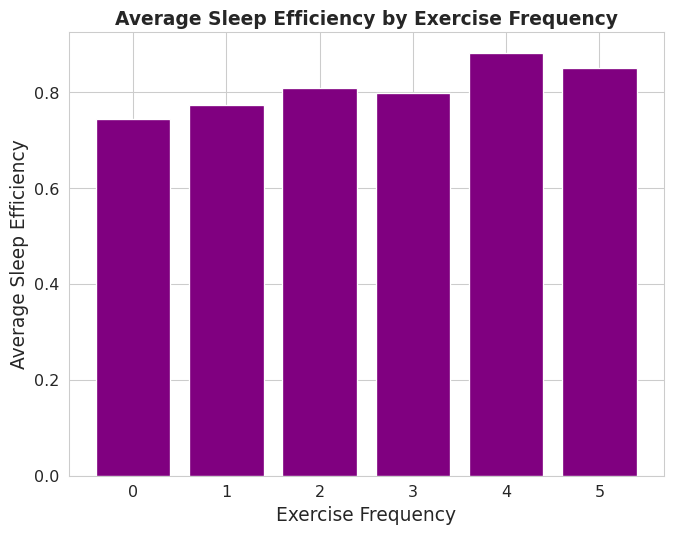

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(avg_sleepdata_efficiency_by_exercise['Exercise frequency'], avg_sleepdata_efficiency_by_exercise['Sleep efficiency'], color='purple')
plt.xlabel('Exercise Frequency', fontsize=14)
plt.ylabel('Average Sleep Efficiency', fontsize=14)
plt.xticks(avg_sleepdata_efficiency_by_exercise['Exercise frequency'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average Sleep Efficiency by Exercise Frequency', fontsize=14, fontweight='bold')
plt.show() 

This part of the analysis focuses on the impact of exercise frequency on sleep efficiency. The bar chart displaying average sleep efficiency across different exercise frequencies reveals that a positive relationship between exercise frequency and sleep efficiency is observed. Individuals with higher exercise frequency had better sleep efficiency, suggesting that engaging in regular physical activity may improve the quality of sleep.

### Sleep Efficiency by Smoking Status

/tmp/ipykernel_98/2557019634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Smoking', y='Sleep efficiency', data=sleepdata,palette= {'1':'purple', '0':'pink'})  # Customize colors


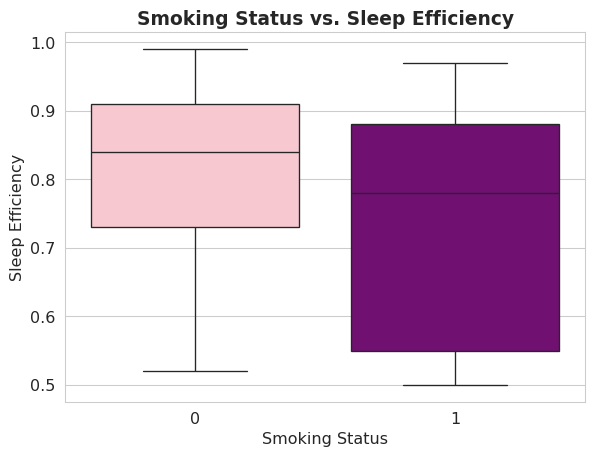

In [18]:
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")  # Use a seaborn style for a cleaner look
sns.boxplot(x='Smoking', y='Sleep efficiency', data=sleepdata,palette= {'1':'purple', '0':'pink'})  # Customize colors

plt.title('Smoking Status vs. Sleep Efficiency', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Sleep Efficiency', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The above box plot explores the effect of smoking on sleep efficiency. We have categorized individuals into smokers and non-smokers to identify any differences in sleep efficiency that could be related to smoking habits. The box plot depicting sleep efficiency across smoking habits reveals that the average sleep efficiency is lower among smokers compared to non-smokers, suggesting that smoking may have a negative impact on sleep quality. Also, the interquartile range for smokers indicates greater variability in sleep efficiency scores among this group. 

This visual suggests that smoking has a negative effect on sleep quality. Moreover, the observed variability among smokers could be influenced by the quantity and duration of smoking, indicating that heavier, long-term smokers may experience more significant sleep disturbances.

### 2) <a name="Q2"></a>Are there significant differences in sleep percentage among different age groups and genders? (Exploring all three sleep cycles).

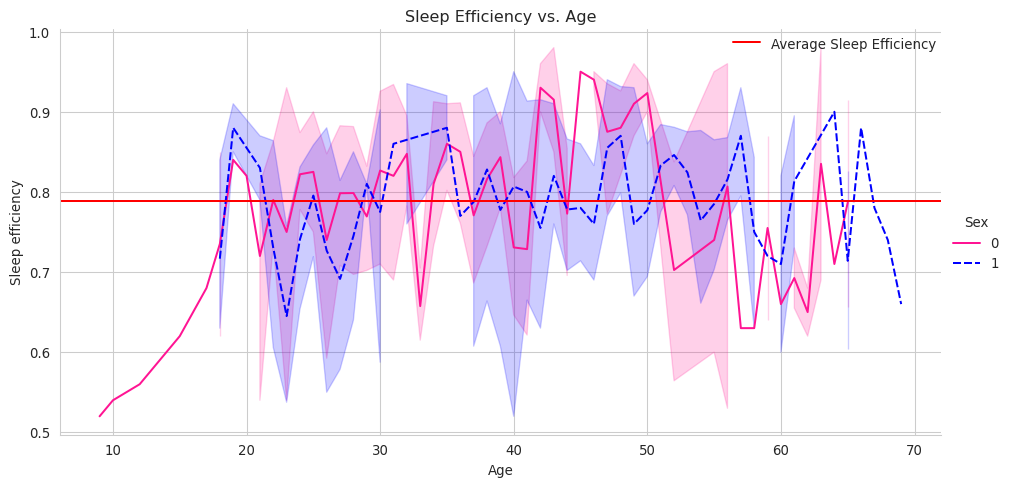

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average sleep efficiency
average_sleep_efficiency = sleepdata["Sleep efficiency"].mean()


# Define palette
palette = {1: "blue", 0: "#FF1493"} 

# Plot using seaborn
sns.relplot(
    data=sleepdata,
    kind="line",
    x="Age",
    y="Sleep efficiency",
    style="Sex",
    hue="Sex",
    palette=palette,
    height=5,  
    aspect=2   
)

# Plot a red solid line indicating the average sleep efficiency
plt.axhline(y=average_sleep_efficiency, color='red', linestyle='-', label='Average Sleep Efficiency')

# Create a separate legend for the average sleep efficiency line
legend = plt.legend(['Average Sleep Efficiency'], loc='best', handlelength=2, handleheight=2, borderaxespad=0, frameon=False)

# Set the color of the legend line to red
for line in legend.get_lines():
    line.set_color('red')

plt.title("Sleep Efficiency vs. Age")
plt.show()


Based on the data and visual evidence, it is evident that there is a relationship between age and sleep efficiency. Furthermore, it appears that men and women experience sleep efficiency differently based on age groups.
For women, sleep efficiency tends to dip below average levels between the ages of 20-35. Subsequently, there's an increase in sleep efficiency observed between the ages of 40-50, followed by another drop between 50-60.
In contrast, men exhibit peak sleep efficiency in their pre-20s, followed by a decline, often below average, until their 30s. However, there is a subsequent increase in sleep efficiency observed between the ages of 30-40 and 60-65, where it tends to sit at or above average levels.

<Figure size 1344x768 with 0 Axes>

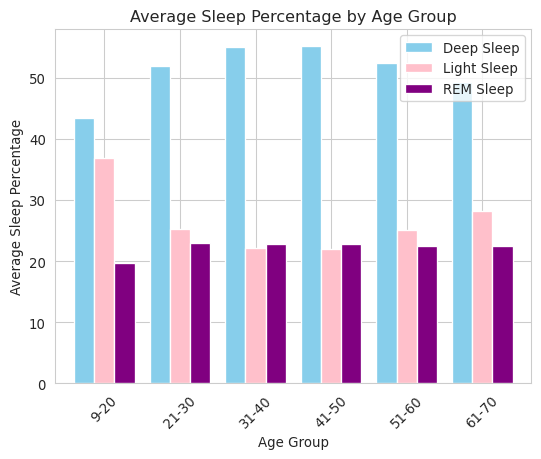

In [21]:
# Define age bins starting from 9
bins = [9, 20, 30, 40, 50, 60, 70]

# Bin the ages
sleepdata['Age_group'] = pd.cut(sleepdata['Age'], bins=bins, labels=['9-20', '21-30', '31-40', '41-50', '51-60', '61-70'])


# Calculate average sleep percentages for each age group
avg_deep_sleep = sleepdata.groupby('Age_group', observed=False)['Deep sleep percentage'].mean()
avg_light_sleep = sleepdata.groupby('Age_group', observed=False)['Light sleep percentage'].mean()
avg_rem_sleep = sleepdata.groupby('Age_group', observed=False)['REM sleep percentage'].mean()

# Combine all average sleep percentages into a single DataFrame
avg_sleep = pd.concat([avg_deep_sleep, avg_light_sleep, avg_rem_sleep], axis=1)

# Plot bar graph for average sleep percentages
plt.figure(figsize=(14, 8))  # Adjusted width of the figure
avg_sleep.plot(kind='bar', color=['skyblue', 'pink', 'purple'], width=0.8)  # Adjusted width of the bars
plt.title('Average Sleep Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Percentage')
plt.xticks(rotation=45)
plt.legend(['Deep Sleep', 'Light Sleep', 'REM Sleep'])
plt.show()


In our investigation into sleep effectiveness, we analyzed the distribution of the three stages of sleep across different age groups, which were divided into bins based on age ranges. The chart above illustrates how individuals in each age group allocate their time across the stages of sleep: deep sleep, light sleep, and REM sleep.
Of particular focus was the duration of deep sleep. Deep sleep is crucial for cognitive performance and memory retention, playing a vital role in processes such as language acquisition, motor proficiency, and brain maturation. While all stages of sleep are essential for overall well-being, deep sleep offers distinct physiological and cognitive benefits. Research suggests that adults should aim for at least seven hours of sleep per night, with approximately 20% of that time spent in deep sleep  (Suni, 2023).
Based on our findings, it appears that regardless of factors such as caffeine intake, smoking status, and exercise frequency, participants in this dataset were consistently spending upwards of 40% of their total sleep time in deep sleep regardless of age.


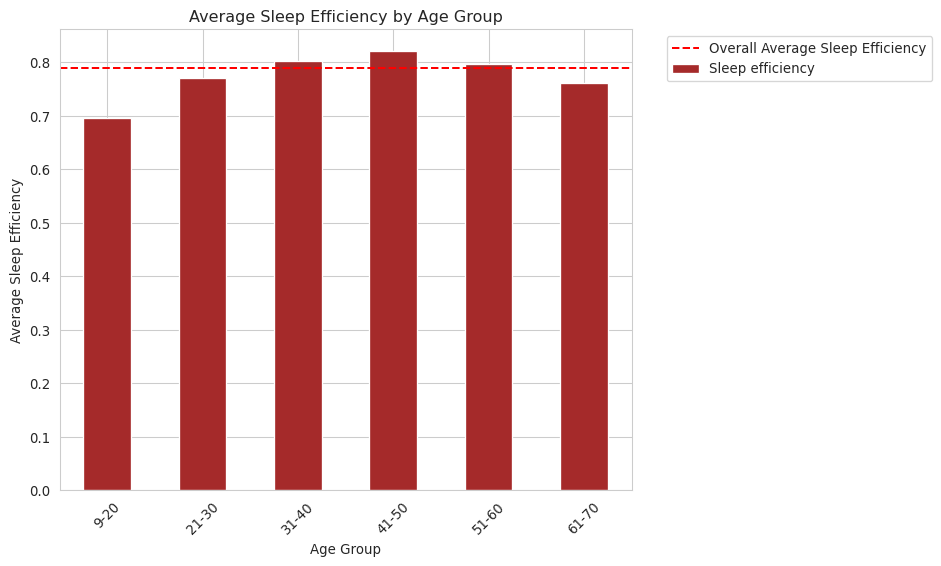

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [9, 20, 30, 40, 50, 60, 70]

# Bin the ages
sleepdata['Age_group'] = pd.cut(sleepdata['Age'], bins=bins, labels=['9-20', '21-30', '31-40', '41-50', '51-60', '61-70'])


# Calculate average sleep efficiency for each age group
avg_sleep_efficiency = sleepdata.groupby('Age_group', observed=False)['Sleep efficiency'].mean()

# Plot bar graph
plt.figure(figsize=(10, 6))
avg_sleep_efficiency.plot(kind='bar', color='brown')
plt.axhline(y=sleepdata["Sleep efficiency"].mean(), color='red', linestyle='--', label='Overall Average Sleep Efficiency') # Add line for overall average sleep efficiency
plt.title('Average Sleep Efficiency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Efficiency')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

The above visual represents the average sleep efficiency across different age groups, which were divided into bins based on age ranges. The overall average sleep efficiency is indicated by the dashed red line, calculated at 78.89%. From the chart, it's evident that different age groups experience sleep efficiency differently. Age bins (9-20), (21-30), and (61-70) exhibit sleep efficiency below the overall average of 78.89%. In contrast, age bins (31-40), (41-50), and (51-60) experience sleep efficiency above the overall average.


### 3) <a name="Q3"></a> Does the bedtime influence overall sleep quality and efficiency?

In [23]:
#Is there a correlation between sleep duration and deep sleep?

#calculating the correlation between sleep duration and deep sleep:

corr = sleepdata['Sleep duration'].corr(sleepdata['Deep sleep percentage']) 
print(f"Correlation between sleep duration and deep sleep: {corr}") 

#calculating the mean of sleep duration with a deep sleep higher than 75%:

deep_percent = 75
deep_sleep = sleepdata[sleepdata['Deep sleep percentage']>= deep_percent] 
avg_sleep = deep_sleep['Sleep duration'].mean()
print(avg_sleep)
print(f"Mean of sleep duration of deep sleep greater or equal to 75%: {avg_sleep}") 

Correlation between sleep duration and deep sleep: -0.03730427384503338
7.5
Mean of sleep duration of deep sleep greater or equal to 75%: 7.5


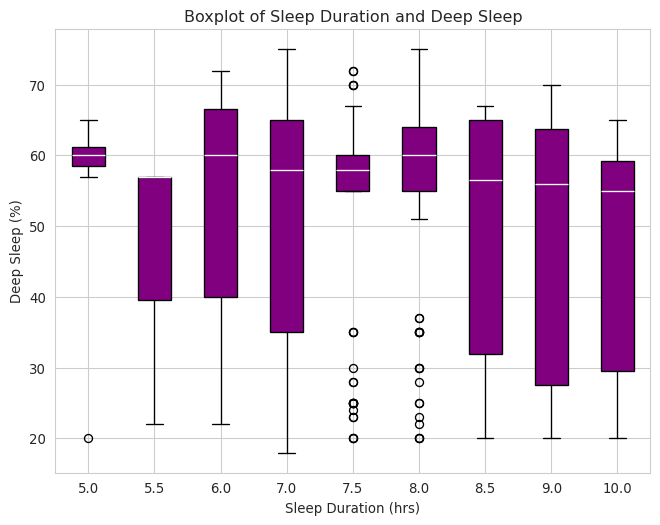

In [24]:

#Boxplot showing the relationship between sleep duration and deep sleep:

plt.figure(figsize=(8,6))
sort = sorted(sleepdata['Sleep duration'].unique())
box = plt.boxplot(sleepdata.groupby('Sleep duration')['Deep sleep percentage'].apply(list), labels=sort, patch_artist=True, medianprops=dict(color='white'))
plt.title('Boxplot of Sleep Duration and Deep Sleep')
plt.xlabel('Sleep Duration (hrs)')
plt.ylabel('Deep Sleep (%)')
for i in box['boxes']:
    i.set(facecolor='purple')
plt.show()



To test the relationship between sleep duration and deep sleep percentage, we decided to use the boxplot. Boxplots are a great way to indicate the variance, mean, maximum and minimum of a certain data point within the variable. If a person was to sleep more hours, would that result in a higher percentage of deep sleep? As seen above, it's easy to observe the relationship between deep sleep percentage and sleep duration. As portrayed by the boxplot, the range that would receive the highest percentage of deep sleep would be within the 8 hours of sleep. 8 hours of sleep, would result in a mean deep sleep percentage of 60%. When looking at the sleep duration that received a maximum of 75% or higher of deep sleep percentage, the 7 and 8 hours of sleep are the only ones to hit that maximum of 75% or greater deep sleep. Also, the 7 hour sleep had the lowest minimum deep sleep percentage of less than 20%. Within the 7 hours of sleep, there is a great amount of variability, given by the longer box, which indicates a wider variance. As well as, the 9 hour sleep, as it's mainly concentrated below the 50% deep sleep range. Overall, one can say that there is a relationship between deep sleep percentage and sleep duration, as there is a clear indication of certain hours of sleep duration that would result in the highest maximum (7-8 hours) and the highest mean (8 hours) of deep sleep. Therefore, generally a person who sleeps more hours is not likely to have a higher deep sleep percentage. As indicated above, 9 to 10 hours of sleep have a lower deep sleep percentage, therefore, sleep duration within the 7.5 to 8 hour range, is likely to result in a higher deep sleep percentage. As calcualted above, the correlation between sleep efficiency and deep sleep percentage was -0.0373, meaning that there is a weak negative correlation between the two variables. This can be explained by the boxplot above, as those who slept 9-10 hours experience a lower deep sleep percentage than those who sleep 7 to 8 hours. 

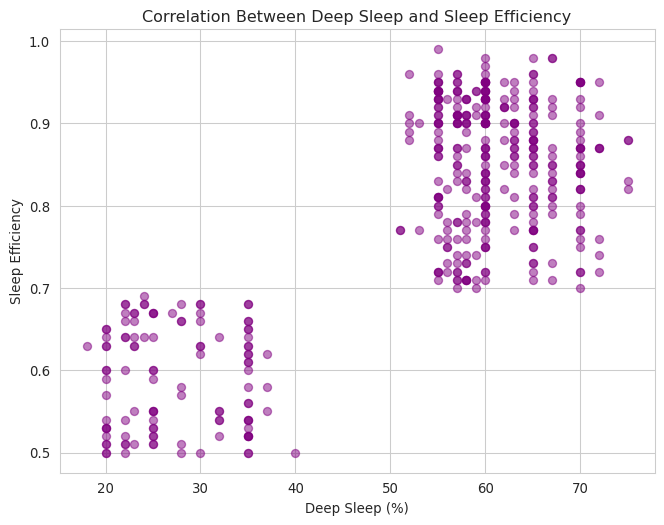

In [25]:
#Scatter-plot showing the correlation between deep sleep and sleep efficiency:
plt.figure(figsize=(8,6))
plt.title('Correlation Between Deep Sleep and Sleep Efficiency')
plt.scatter(sleepdata['Deep sleep percentage'], sleepdata['Sleep efficiency'], alpha=0.5, color="purple")
plt.xlabel('Deep Sleep (%)')
plt.ylabel('Sleep Efficiency')
plt.show()

Next, we wanted to test the correlation between deep sleep and sleep efficiency. The question would be, is there correlation between deep sleep and sleep efficiency? We decided to plot the two variables using a scatter plot, as it would help in analyzing the patterns of the dataset. As seen on the scatter plot, there is a clear pattern observed. Deep sleep percentages of 20-35% had sleep efficiency of ~0.5-0.69 and deep sleep percentages of 50-75% had sleep efficiency of ~0.7-0.99. Therefore, it is clear to see that there is a strong positive correlation between deep sleep percentage and sleep efficiency. This means that if one were to incur a higher deep sleep percentage, their sleep would be considered more efficient. 

### Correlation Matrix 

<function matplotlib.pyplot.show(close=None, block=None)>

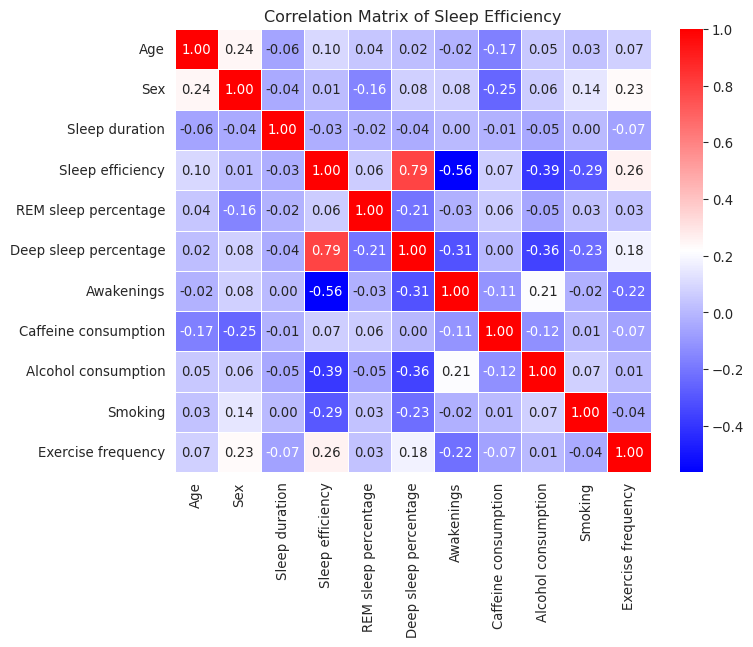

In [26]:
#Building a correlation matrix to see the correlation among the different variables:

#calculating the correlation between all variables within the dataset:
#Specific variables:

Specific = ['Age', 'Sex', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Exercise frequency']
sleep_spec = sleepdata[Specific]

corr_sleepdata = sleep_spec.corr()

#plotting, with the use of a heatmap, the correlation among all variables:
plt.figure(figsize=(8,6))
sns.heatmap(corr_sleepdata, annot=True, cmap='bwr', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix of Sleep Efficiency')

plt.show

Correlation matrix is a great way to depict how the different variables interact with one another, as it offers a quick holistic look into the patterns within the dataset. As our dataset focuses around how different variables affect sleep quality, we decided to build a correlation matrix to portray the different relationships within the variables affecting sleep. As depicted above, alcohol consumption has a strong inverse relationship (-0.39) with sleep efficiency. Meaning, a person who consumes a lot of alcohol is likely to have lower sleep efficiency. Another one that is worth mentioning is the smoking status of an individual. Those declared as smokers, are likely to have lower sleep efficiency, as smoking has a strong inverse relationship (-0.29) with sleep efficiency. Exercise frequency has an inverse relationship with awakenings (-0.22), meaning that the more one exercises, the less times they are likely to wakeup in the middle of their sleep. Meaning that exercise frequency increases sleep quality. Futhermore, exercise frequency has a strong positive correlation (0.26) with sleep efficiency, meaning the higher the frequency of exercise, the higher the sleep efficiency. Therefore, just by performing a correlation matrix, one can easily look at the different variables and how they interact with one another. 

### 4) <a name="Q4"></a> Is there a correlation between sleep duration and deep sleep?  

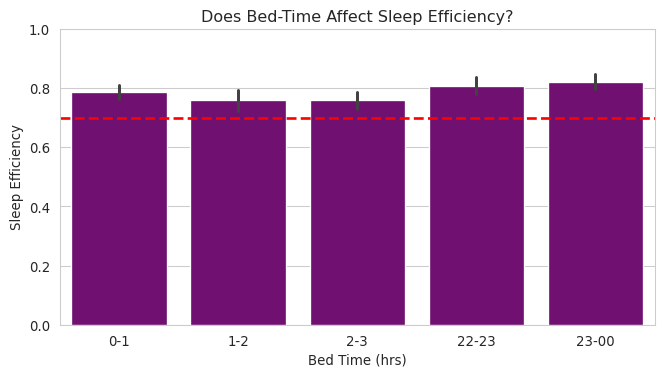

Groups
0-1      0.788000
1-2      0.759403
2-3      0.759219
22-23    0.807945
23-00    0.822410
Name: Sleep efficiency, dtype: float64
Groups
0-1      1.647619
1-2      1.954545
2-3      1.803279
22-23    1.536232
23-00    1.362500
Name: Awakenings, dtype: float64
Groups
0-1      52.336364
1-2      52.223881
2-3      49.562500
22-23    54.232877
23-00    55.421687
Name: Deep sleep percentage, dtype: float64
Groups
0-1      7.618182
1-2      7.611940
2-3      7.390625
22-23    7.328767
23-00    7.331325
Name: Sleep duration, dtype: float64


/tmp/ipykernel_98/122882263.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calc= sleepdata.groupby('Groups')['Sleep efficiency'].mean()
/tmp/ipykernel_98/122882263.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  awak= sleepdata.groupby('Groups')['Awakenings'].mean()
/tmp/ipykernel_98/122882263.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deep= sleepdata.groupby('Groups')['Deep sleep percentage'].mean()

In [27]:
#Does bed-time influence overall sleep quality and efficiency?

#Taking the hours:
sleepdata['Bed Time']= pd.to_datetime(sleepdata['Bed Time'], format='%H:%M:%S') 
sleepdata['Bed Time (hr)']= sleepdata['Bed Time'].dt.hour

#Creating bins for the different intervals of the bedtimes:

Groups = [0,1,2,3,22,23,24] 

bed_hour = ['0-1', '1-2', '2-3','22-23','23-00']

#Creating a bar chart for the different intervals to plot sleep efficiency vs. bed-time:

sleepdata['Groups']= pd.cut(sleepdata['Bed Time (hr)'], bins=Groups[:-1], labels=bed_hour, right=False)

plt.figure(figsize=(8,4))
ax=sns.barplot(x='Groups', y='Sleep efficiency', data=sleepdata, color='purple')
ax.axhline(0.7, color='red', linestyle='--', linewidth=2)
plt.ylim(0,1)
plt.xlabel('Bed Time (hrs)')
plt.ylabel('Sleep Efficiency')
plt.title('Does Bed-Time Affect Sleep Efficiency?')
plt.show()

calc= sleepdata.groupby('Groups')['Sleep efficiency'].mean()
print(calc)

awak= sleepdata.groupby('Groups')['Awakenings'].mean()
print(awak)

deep= sleepdata.groupby('Groups')['Deep sleep percentage'].mean()
print(deep)

dur= sleepdata.groupby('Groups')['Sleep duration'].mean()
print(dur)

When examining the effect of bed-time on sleep efficiency, it's important to group the bed-time into seperate bins. This allows the histogram to be presented in a clear manner. As seen by the histogram, there is a clear difference in the sleep efficiency for the group who slept from 22 to 00 (10pm-12am), as opposed to those who slept from 0 to 3. This is intuitive, as one would normally assume that sleeping early would result in better sleep quality. Also, when calculating the mean sleep efficiency for the different groups, those who slept from 23-00 had the highest mean sleep efficiency of 0.822410. The second highest mean sleep efficiency, was for those who slept from 22-23, with a mean of 0.807945. The lowest mean for sleep efficiency was for those with a bed time of 2 am to 3 am , with a mean of 0.759219. 

To get a more holistic look, we looked at the mean number of awakenings grouped by the different bed-times. The group with bed-time of 23-24 (11pm-12am), had the lowest mean number of awakenings, which equalled 1.362500. The group with bed-time 1 am -2 am, had the highest number of awakenings of 1.954545. 

Then we calculated the mean of the deep sleep percentage, to see how bed-time affects deep sleep. Those who slept 23-00 had the highest percentage of 55.421687% and those who slept between 2-3 had the lowest percentage of deep sleep (49.562500%). Lastly, we examined the sleep duration and how bed-time would influence the duration of sleep. Those who slept anywhere between 12am to 2 am, had the longest hours of sleep ~(7.6 hours) and those who slept anywhere between 10pm to 12am, on average, had the lowest hours of sleep ~(7.3 hours). 

Therefore, when asking the question, does bed-time affect sleep efficiency? The answer would be a clear yes, as those who slept earlier (22-00) had the highest mean of sleep efficiency, the lowest number of awakenings and the highest mean of deep sleep percentage. Ultimately, the time a person chooses to go to sleep, will, very likely, affect the quality of their sleep. 

## <a name="conclusion"></a> Conclusion 

Analyzing the dataset of sleep efficiency, allowed us to look deeper into how daily habits affect the quality of our sleep. It was very interesting to see how the different variables interact with one another. Certian factors, such as exercise frequency, can be intutive, as one would normally assume that the more active they are, the better their sleep will be. However, other factors, such as smoking status, might be surprising to some, as smoking isn't normally talked about in terms of its effect on sleep. After conducting the various calculations and plot the graphs of different variables, it gave us a clearer sense into data science. In data science, it's important to put one's biases aside and actually take time to explore each of the variables within the data-set because that will open new avenues for testing and further researching certain topics of interest. 

##### Is an individual’s lifestyle responsible for the efficiency of their sleep? (Caffeine consumption, alcohol consumption, exercise and smoking status)

To analyze the impact of sleep lifestyle factors such as caffeine consumption, alcohol consumption, exercise frequency, and smoking habits, we conducted a series of visual analyses. Our analysis reveals insights into how lifestyle factors are associated with sleep quality. The bar charts and box plot suggest that each of the factors in our study has a distinct relationship with sleep efficiency.
Exercise frequency demonstrated a positive correlation with sleep efficiency, suggesting that regular physical activity may promote better sleep quality. This finding reinforces the role of exercise as a beneficial lifestyle choice for enhancing sleep quality. Furthermore, the assessment of alcohol consumption and sleep efficiency suggests a negative association between alcohol consumption frequency and sleep efficiency. However, the variability in the decline of sleep efficiency at higher consumption levels may indicate individual differences in alcohol tolerance. Moreover, the analysis of smoking status revealed that non-smokers tend to have higher sleep efficiency than smokers. This highlights the importance of public health efforts to lower smoking rates to improve sleep health. In addition, our results indicate that there is not enough evidence to suggest a clear pattern of sleep efficiency being affected by how much caffeine is consumed. Our visual demonstrates that various levels of caffeine consumption have only a minimal impact on sleep efficiency.

##### Are there significant differences in sleep percentage among different age groups and genders?  
Based on our data analysis, there are notable differences in sleep efficiency between men and women as they age. Key findings indicate that both genders exhibit fluctuating levels of sleep efficiency over their lifespan. Women tend to display higher sleep efficiency levels in later stages of life, whereas men tend to have higher sleep efficiency in earlier years. Upon comprehensive analysis, it was observed that sleep efficiency tends to be below average in early adulthood, progressively increasing to above-average levels between ages 30 and 60, and then gradually declining. Notably, regardless of factors such as caffeine intake, smoking habits, or exercise frequency, all participants consistently spent over 40% of their total sleep time in deep sleep, irrespective of age. These results challenge common assumptions of a 20% deep sleep duration and warrant further exploration into individual sleep patterns, unmeasured variables' influence, or dataset limitations.


##### Is there correlation between sleep duration and deep sleep? 

One might immediatly answer with yes, as a lot of us were taught that the longer one sleeps, the better their sleep is likely to be. After conducting the statistical testings and plotting the variables, the answer might be slightly contrary to popular belief. This is because there is a weak negative correlation between sleep duration and deep sleep. If someone were to sleep for 7.5 hours, they are more likely to experience a higher deep sleep percentage, than someone who slept for 10 hours. This, again, is a reason why one must put their preconceived notions aside when exploring data-sets, as certain results might result in contradition to certain popular believes. 

##### Does bed-time influence overall sleep quality and efficiency? 

After conducting statistical analysis and depicting the relationship between the two variables as a histogram, the answer is yes. The time a person choose to go to bed, is highly likely to influence their overall sleep quality. This is because they are less likely to encounter awakenings during the night, more likely to have a higher percentage of sleep, and overall, more likely to experience higher sleep efficiency. Therefore, if one is looking for ways to improve their sleep, starting with choosing the proper bed-time should be a priority.  


Based on our findings, several potential next steps for research could be considered. One such avenue involves extending the investigation to explore caffeine consumption in a more controlled manner. For instance, in a future study, participants could be administered varying doses of caffeine, paying closer attention to the timing of caffeine intake before bedtime. While caffeine is widely recognized as a sleep disruptor, our study's data hindered a comprehensive observation of its effects.

Furthermore, our analysis indicates that exercise frequency and smoking status impact sleep efficiency. Therefore, we recommend individuals seeking to enhance their sleep hygiene to engage in regular exercise and refrain from smoking. These lifestyle adjustments could potentially lead to improved sleep quality.


## <a name="conclusion"></a> References

Equilibrium ′Sleep Efficiency Dataset ′ , Kaggle, Available at: https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data (Accessed: 22 January 2024).

Suni, E. (2023). What Is Circadian Rhythm? [online] Sleep Foundation. Available at: https://www.sleepfoundation.org/circadian-rhythm.
